Examen II IA Sección 1900 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv("BankChurners.csv")

In [3]:
bank_df.shape

(10127, 23)

In [4]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
bank_df.drop(columns = [bank_df.columns[len(bank_df.columns) - 1], bank_df.columns[len(bank_df.columns) - 2]], inplace = True)

In [6]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


-	Trate las variables nulas:
o	En caso de que la columna tenga mas del 90% de valores nulos excluir 
o	En caso de que se variable numérica, identifique alguna buena estrateficacion para remplazar los valores nulos por el valor de la mediana 
o	En caso de que sean variables categóricas reemplazar por el valor “others”


In [7]:
bank_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
bank_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
bank_df.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [11]:
for cols in bank_df.columns:
    valores_unicos = bank_df[cols].unique()
    tamaño_valores = len(valores_unicos)
    print(cols , tamaño_valores)

CLIENTNUM 10127
Attrition_Flag 2
Customer_Age 45
Gender 2
Dependent_count 6
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


In [12]:
#------ Tratamiento de Variables Nulas ------#

# 1 - Exclusion de columnas con mas del 90% de valores nulos

#Arreglo para guardar aquellas columnas que en sus valores, nulo represente mas del 90% de la columna
cols_drop = []

#Para cambiar los valores NaN por la palabra Nulo y asi poder hacer la agrupacion
for cols in bank_df.columns:
    levels = bank_df.groupby( [cols], as_index = False ).agg( {"CLIENTNUM" : ["count"] } )
    levels.columns = levels.columns.droplevel(1)
    levels["Percentage"] = levels["CLIENTNUM"] / bank_df.shape[0]
    levels = levels.sort_values(["Percentage"] , ascending = False)
    
    if ((levels[cols].iloc[0] == 0)|(levels[cols].iloc[0] == "Unknown")) & (levels["Percentage"].iloc[0] >= 0.90):
        bank_df = bank_df.drop( [cols], axis = 1 )
        cols_drop.append(cols)
    else:
        continue

cols_drop

[]

In [13]:
#Manera de dividir las columnas por sus tipos, ya sea numerica o categorica
cols_numeric = []
cols_category = []

for cols_ in bank_df.columns:
    if (bank_df[cols_].dtypes in['int64']) | (bank_df[cols_].dtypes in['float64']):
        cols_numeric.append(cols_)
    elif bank_df[cols_].dtypes in['object']:
        bank_df[bank_df[cols] == ""]
        cols_category.append(cols_)
    else: 
        continue

In [14]:
cols_numeric

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [15]:
cols_category

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [16]:
# 2 - Cambiar valores nulos por mediana en las columnas numéricas
for cols in cols_numeric:
    bank_df.loc[bank_df[cols] == 0, cols] = np.median(bank_df[cols])

In [17]:
ValorNull = bank_df.loc[bank_df["Dependent_count"] == 0 , ["Dependent_count"]]
ValorNull

,Dependent_count


In [18]:
# 3 - Cambiar valores nulos de variables categoricas por "Others"
bank_df = bank_df.replace(['Unknown'],'Others')

In [19]:
Unknown = bank_df.loc[bank_df["Marital_Status"] == 0 , ["Marital_Status"]]
Unknown

,Marital_Status


-	Limpie las variables categóricas
o	Según las técnicas de tratamiento de limpieza de valores continuos limpie y transforme las variables categóricas
o	Dejar en CSVs las traducciones o reglas que genera de las variables categóricas.


In [20]:
#------ Limpieza de Variables Categoricas ------#

# 1 - Limpieza y Transformacion de variables categoricas
valid_columns = []
cols_many_levels = []
cols_one_level = []
cols_levels_very_representative = []
new_columns = []

size_df = bank_df.shape[0]
umbral = .95

for c_ in cols_category:
    levels = bank_df.loc[: , [c_] ].drop_duplicates().shape[0]
    
    if ( levels / size_df ) >= umbral:
        cols_many_levels.append(c_)
    elif levels == 1:
        cols_one_level.append(c_)
    else:
        levels_group = bank_df.groupby( [c_], as_index = False ).agg( {"CLIENTNUM" : ["count"] } )
        levels_group.columns = levels_group.columns.droplevel(1)
        levels_group["Percentage"] = levels_group["CLIENTNUM"] / bank_df.shape[0]
        levels_group = levels_group.sort_values(["Percentage"] , ascending = False)
        
        #Si un nivel tiene mas del 90% porciento de datos las descartamos
        if (levels_group["Percentage"].iloc[0] >= 0.90):
            cols_levels_very_representative.append(c_)
        else:
            valid_columns.append(c_)

In [21]:
#Observar los niveles de las columnas categoricas para hacer el analisis
for c_ in valid_columns:
    print(bank_df.loc[:, [c_]].value_counts())

Attrition_Flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64
Gender
F         5358
M         4769
dtype: int64
Education_Level
Graduate           3128
High School        2013
Others             1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64
Marital_Status
Married           4687
Single            3943
Others             749
Divorced           748
dtype: int64
Income_Category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Others             1112
$120K +             727
dtype: int64


In [22]:
# ---- Limpieza Education_Level ---------
levels = bank_df.loc[: , ["Education_Level"] ].drop_duplicates().shape[0]
    
#Cada columna categorica la dejaremos con maximo 4 niveles, las que tengan mas de 4 niveles las trataremos siendo el cuarto nivel "Others"
levels_group = bank_df.groupby( ["Education_Level"], as_index = False ).agg( {"CLIENTNUM" : ["count"] } )
levels_group.columns = levels_group.columns.droplevel(1)
levels_group["Percentage"] = levels_group["CLIENTNUM"] / bank_df.shape[0]
levels_group = levels_group.sort_values(["Percentage"] , ascending = False)

#Valor del porcentaje del nivel final que dejaremos de la columna
final_level = levels_group["Percentage"].iloc[3]
        
#Nueva columna con los valores transformados
levels_group["Education_Level_new"] = levels_group.apply( lambda r: ("Others" if r["Percentage"] < final_level else r["Education_Level"]) , axis = 1)
levels_group = levels_group.drop( ["CLIENTNUM", "Percentage"], axis = 1 )
new_columns.append(levels_group.columns[1])
        
bank_df = bank_df.merge(levels_group, on = ["Education_Level"], how = "left")
bank_df.loc[pd.isnull(bank_df["Education_Level_new"]), "Education_Level_new"] = "Others"

# ---- Limpieza Income_Category ---------
niveles = bank_df.loc[: , ["Income_Category"] ].drop_duplicates().shape[0]
    
#Cada columna categorica la dejaremos con maximo 4 niveles, las que tengan mas de 4 niveles las trataremos siendo el cuarto nivel "Others"
niveles_group = bank_df.groupby( ["Income_Category"], as_index = False ).agg( {"CLIENTNUM" : ["count"] } )
niveles_group.columns = niveles_group.columns.droplevel(1)
niveles_group["Percentage"] = niveles_group["CLIENTNUM"] / bank_df.shape[0]
niveles_group = niveles_group.sort_values(["Percentage"] , ascending = False)

#Valor del porcentaje del nivel final que dejaremos de la columna
final = niveles_group["Percentage"].iloc[3]
        
#Nueva columna con los valores transformados
niveles_group["Income_Category_new"] = niveles_group.apply( lambda r: ("Others" if r["Percentage"] < final else r["Income_Category"]) , axis = 1)
niveles_group = niveles_group.drop( ["CLIENTNUM", "Percentage"], axis = 1 )
new_columns.append(niveles_group.columns[1])
        
bank_df = bank_df.merge(niveles_group, on = ["Income_Category"], how = "left")
bank_df.loc[pd.isnull(bank_df["Income_Category_new"]), "Income_Category_new"] = "Others"

In [23]:
# 2 - Archivo csv con las reglas
levels_group = levels_group.set_index(["Education_Level", "Education_Level_new"])
levels_group.to_csv("Education_Level_rules.csv", header=True)

niveles_group = niveles_group.set_index(["Income_Category", "Income_Category_new"])
niveles_group.to_csv("Income_Category_rules.csv", header=True)

-	Limpie las variables numéricas:
o	Identifique y explique una buena estratificación de cómo debería de ser analizado los valores numéricos continuos.
o	En caso de que en esas estratificaciones para los valores numéricos continuos hayan valores atípicos, remplazarlos por la media.


In [24]:
## A través de gráficas vamos a observar el comportamiento de las valores en base a los tipos de clientes (Attrition_Flag)

In [25]:
def plot_num(var):
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=bank_df);

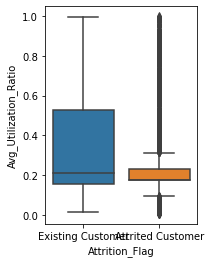

In [26]:
plot_num('Avg_Utilization_Ratio')

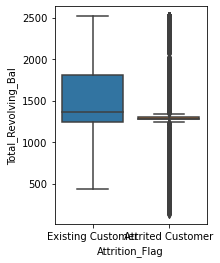

In [27]:
plot_num('Total_Revolving_Bal')

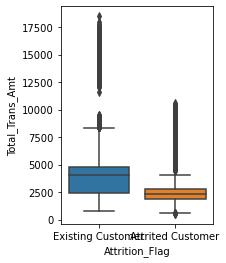

In [28]:
plot_num('Total_Trans_Amt')

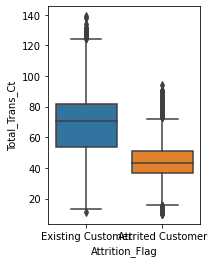

In [29]:
plot_num('Total_Trans_Ct')

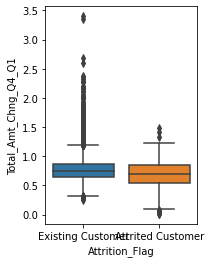

In [30]:
plot_num('Total_Amt_Chng_Q4_Q1')

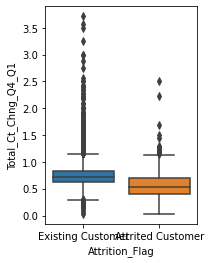

In [31]:
plot_num('Total_Ct_Chng_Q4_Q1')

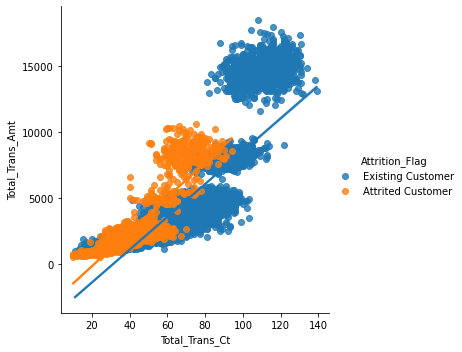

In [32]:
sns.lmplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', data= bank_df)

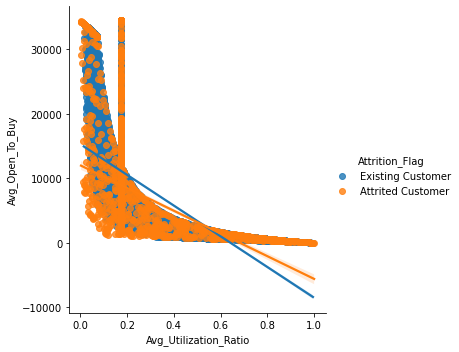

In [33]:
sns.lmplot(x='Avg_Utilization_Ratio', y='Avg_Open_To_Buy', hue='Attrition_Flag', data= bank_df)

In [ ]:
## No hay regresión lineal entre nuestro objetivo que son los clientes y las variables que analizamos que serían nuestras salidas.

## Analizamos los bloxplot juntos con sus histogramas antes de cambiar los valores de 0 por las medianas, observamos que dichas columnas
## nos mostraban la probabilidad de que un cliente usara la tarjeta / abandonara el servicio. //// Luego de hacer el cambio de variable no
## se nos permitió el uso de histogramas.

In [38]:
df = bank_df.loc[ (bank_df['Attrition_Flag'] == 'Existing Customer') & (bank_df['Gender'] == 'F') , ['Total_Trans_Amt'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x179c15fdb80>,
 'caps': [<matplotlib.lines.Line2D at 0x179c160c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x179c15fd7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x179c160ca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x179c160cd90>],
 'means': []}

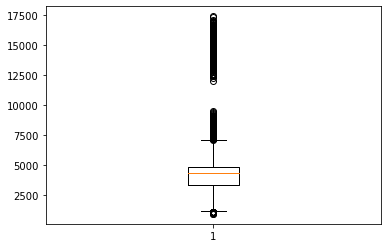

In [39]:
plt.boxplot(df)

In [40]:
q1 = np.quantile( df , 0.25 )
q3 = np.quantile( df , 0.75 )

In [41]:
np.median( df )

4311.0

In [42]:
np.mean(df)

Total_Trans_Amt    4647.788166
dtype: float64

In [43]:
np.quantile( df , 0.5 )

4311.0

In [44]:
iqr = q3 - q1

In [45]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [46]:
df.loc[ (df['Total_Trans_Amt'] > upper_bound) | (df['Total_Trans_Amt'] < lower_bound) , : ]

,Total_Trans_Amt
25,1051
28,1052
37,966
44,1042
55,1052
...,...
10090,15681
10099,16737
10102,16706
10106,15068


In [47]:
dfq1 = bank_df.loc[ : , ["Gender","Total_Trans_Amt"] ].groupby( ["Gender"] , as_index = False ).quantile(0.25)
dfq1.columns = ["Gender","total_trans_q1"]

In [55]:
dfq2 = bank_df.loc[ : , ["Gender","Total_Trans_Amt"] ].groupby( ["Gender"] , as_index = False ).quantile(0.5)
dfq2.columns = ["Gender","total_trans_q2"]

In [56]:
dfq3 = bank_df.loc[ : , ["Gender","Total_Trans_Amt"] ].groupby( ["Gender"] , as_index = False ).quantile(0.75)
dfq3.columns = ["Gender","total_trans_q3"]

In [52]:
dfq3.shape

(2, 2)

In [57]:
df_iqr = dfq1.merge( dfq3 , on=["Gender"] , how="inner" ).merge( dfq2 , on=["Gender"] , how="inner" )

In [58]:
df_iqr

,Gender,total_trans_q1,total_trans_q3,total_trans_q2
0,F,2424.25,4751.75,4134.0
1,M,1881.00,4711.00,3513.0


In [59]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["total_trans_q3"] - r["total_trans_q1"] , axis = 1)

In [60]:
df_iqr

,Gender,total_trans_q1,total_trans_q3,total_trans_q2,iqr
0,F,2424.25,4751.75,4134.0,2327.5
1,M,1881.00,4711.00,3513.0,2830.0


In [61]:
df_iqr["upper"] = df_iqr.apply( lambda r: ( r["total_trans_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["total_trans_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [62]:
df.shape

(4428, 1)

In [63]:
df_t = bank_df.merge( df_iqr , on=["Gender"] , how="left" ).copy()

In [64]:
df_t.shape

(10127, 29)

In [65]:
df_t

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_new,Income_Category_new,total_trans_q1,total_trans_q3,total_trans_q2,iqr,upper,lower
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,High School,$60K - $80K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,Graduate,Less than $40K,2424.25,4751.75,4134.0,2327.5,8243.0,-1067.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.176,Graduate,$80K - $120K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0
3,769911858,Existing Customer,40,F,4,High School,Others,Less than $40K,Blue,34,...,2.333,0.760,High School,Less than $40K,2424.25,4751.75,4134.0,2327.5,8243.0,-1067.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.176,Uneducated,$60K - $80K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.857,0.462,Graduate,$40K - $60K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0
10123,710638233,Attrited Customer,41,M,2,Others,Divorced,$40K - $60K,Blue,25,...,0.683,0.511,Others,$40K - $60K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.818,0.176,High School,Less than $40K,2424.25,4751.75,4134.0,2327.5,8243.0,-1067.0
10125,717406983,Attrited Customer,30,M,2,Graduate,Others,$40K - $60K,Blue,36,...,0.722,0.176,Graduate,$40K - $60K,1881.00,4711.00,3513.0,2830.0,8956.0,-2364.0


In [71]:
def getTtrans(r):
    if ( r["Total_Trans_Amt"] <= r["lower"] ) | ( r["Total_Trans_Amt"] >= r["upper"] ):
        return r["total_trans_q2"]
    else:
        return r["Total_Trans_Amt"]

In [72]:
df_t.apply( lambda r: getTtrans(r) , axis = 1 )

0        1144.0
1        1291.0
2        1887.0
3        1171.0
4         816.0
          ...  
10122    3513.0
10123    8764.0
10124    4134.0
10125    8395.0
10126    4134.0
Length: 10127, dtype: float64

In [74]:
df_t["New_Total"] = df_t.apply( lambda r: getTtrans(r) , axis = 1 )

<AxesSubplot:xlabel='Gender', ylabel='New_Total'>

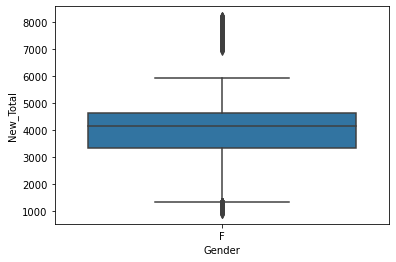

In [78]:
sns.boxplot( data=df_t.loc[ (df_t['Attrition_Flag'] == 'Existing Customer') & (df_t['Gender'] == 'F') , : ]  , x="Gender" , y="New_Total" )